### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Govind S\Downloads\ds\kaggle\knowledge\titanic\spaceship-titanic\train.csv")

In [3]:
#data['total_expense']=data.RoomService+data.FoodCourt+data.ShoppingMall+data.Spa+data.VRDeck

### Cleaning the data, Since There are a lt of categories for cabin column, only taking the first letter, which seems to represent a section of cabins

In [4]:
data.drop(['PassengerId'],axis=1,inplace=True)
data.drop(['Name'],axis=1,inplace=True)
data_1=data.copy()
data_1['Cabin_s']=data_1.Cabin.str[-1]
data_1.Cabin=data_1.Cabin.str[0]
categorical_columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Cabin_s']
for i in categorical_columns:
    data_1[i].fillna(data_1[i].mode()[0],inplace=True)

data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,S


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_s       8693 non-null   object 
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


In [6]:
data_1['Age'].mean()

28.82793046746535

In [7]:
data_1['Age'].fillna(data_1['Age'].mean(),inplace=True)
cont_columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in cont_columns:
    data_1[i].fillna(data_1[i].median(),inplace=True)

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_s       8693 non-null   object 
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


In [8]:
data_1.VIP=data_1.VIP.astype('int')
data_1.Transported=data_1.Transported.astype('int')
data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,Europa,False,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,P
1,Earth,False,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,S
2,Europa,False,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,S
3,Europa,False,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,S
4,Earth,False,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,P
8689,Earth,True,G,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,S
8690,Earth,False,G,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,S
8691,Europa,False,E,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,S


In [9]:
categorical_columns.pop(-2)

'VIP'

In [10]:
categorical_columns

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Cabin_s']

### Using labelencoder

In [11]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_columns:
    le=LabelEncoder()
    data_1[i]=le.fit_transform(data_1[i])

data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


### Saving the cleaned dataframe for future use

In [25]:
import joblib
filename = 'cleaned_dataframe.sav'
joblib.dump(data_1,filename)

['cleaned_dataframe.sav']

### Using randome forest for model building

### Hyper-parameter tuning

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import preprocessing
df=data.copy()
x=data_1.drop(['Transported'],axis=1)
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=data_1.iloc[:,-2]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)
kfold=KFold(n_splits=10)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5,6,7,8,9,10,11,12],'max_features':[3,4,5,6]}]
rf = RandomForestClassifier(criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,n_jobs=-1,cv=kfold)
gsrf.fit(x_train,y_train)
gsrf.best_params_ , gsrf.best_score_

({'max_depth': 8, 'max_features': 5, 'n_estimators': 70}, 0.8025649135863724)

### Building a model with best parameters

In [29]:
from sklearn import metrics
model_rf = RandomForestClassifier(n_estimators=70,max_depth=8,max_features=5,criterion='gini',random_state=23)
model_rf.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_rf.predict(x_test)))
print(metrics.recall_score(y_test,model_rf.predict(x_test)))
print(metrics.classification_report(y_test,model_rf.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_rf.predict(x_test)))

0.79700977573318
0.8310502283105022
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       863
           1       0.78      0.83      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

confusion matrix:

 [[658 205]
 [148 728]]


In [14]:
x_train

array([[ 0.44038529, -0.73277002, -1.31837333, ..., -0.28357863,
        13.26827196,  2.20511752],
       [-0.81725903, -0.73277002,  0.38547017, ..., -0.28190632,
         0.34776712, -0.26300329],
       [ 1.6980296 , -0.73277002,  0.38547017, ..., -0.20497974,
        -0.24485953, -0.26300329],
       ...,
       [ 1.6980296 , -0.73277002, -0.18247766, ..., -0.24845998,
        -0.26707192,  0.45212568],
       [-0.81725903, -0.73277002,  0.95341801, ..., -0.28357863,
        -0.2706259 , -0.26300329],
       [-0.81725903, -0.73277002,  0.95341801, ..., -0.28357863,
         0.49081493, -0.2488947 ]])

### lgbm hyper-parameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
param_grid=[{'max_depth':[2,3,4,5,6,7,8,9,10,11,12],'learning_rate':[0.01,0.03,0.05,0.07,0.09,0.10,0.20]}]
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,random_state=42,categorical_feature=[0,1,2,3,5,11])
gslgb = GridSearchCV(model_lgb,param_grid,n_jobs=-1,cv=kfold)
gslgb.fit(x_train,y_train)
gslgb.best_params_ , gslgb.best_score_

C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'


({'learning_rate': 0.07, 'max_depth': 5}, 0.8008397419995038)

### Building a model with lgbm

In [37]:
from sklearn import metrics
model_lgb = lgb.LGBMClassifier(learning_rate=0.07,random_state=42,max_depth=5)
model_lgb.fit(x_train,y_train,categorical_feature=[0,1,2,3,5,11],verbose=20)
print(metrics.accuracy_score(y_test,model_lgb.predict(x_test)))
print(metrics.recall_score(y_test,model_lgb.predict(x_test)))
print(metrics.classification_report(y_test,model_lgb.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_lgb.predict(x_test)))

0.7906843013225991
0.839041095890411
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       863
           1       0.77      0.84      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

confusion matrix:

 [[640 223]
 [141 735]]


C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


### Hyper-parameter tuning for SVM

In [38]:
from sklearn.svm import SVC
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(svm,param_grid,n_jobs=-1,cv=kfold)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 13, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7969529893326718)

### Building a model with the best arameters

In [24]:
model_svm = SVC(kernel='rbf',gamma=0.1,C=15)
model_svm.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_svm.predict(x_test)))
print(metrics.recall_score(y_test,model_svm.predict(x_test)))
print(metrics.classification_report(y_test,model_svm.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_svm.predict(x_test)))

0.7786083956296722
0.7968036529680366
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       863
           1       0.77      0.80      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

confusion matrix:

 [[656 207]
 [178 698]]


### For logistic regression categorical variables to be encoded using one hot encoding

In [39]:
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [40]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [41]:
data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


In [12]:
data_2=data_1.copy()

In [13]:
data_2.CryoSleep.value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [14]:
data_2=pd.get_dummies(data_2,columns=['HomePlanet','Cabin','Destination'])

In [15]:
data_2

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s,...,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Destination_0,Destination_1,Destination_2
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,1,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,...,0,0,0,0,0,1,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score

x_1=data_2.drop(['Transported'],axis=1)
ss=preprocessing.StandardScaler()
x_1=ss.fit_transform(x_1)
y_1=data_2.loc[:,'Transported']
x_1train,x_1test,y_1train,y_1test=train_test_split(x_1,y_1, test_size=0.2,random_state=0)

In [20]:
x_1

array([[-0.73277002,  0.70943692, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.65252063],
       [-0.73277002, -0.33671733, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.65252063],
       [-0.73277002,  2.03456565,  6.53325471, ..., -0.51101319,
        -0.31748665,  0.65252063],
       ...,
       [-0.73277002, -0.1972301 , -0.15306307, ..., -0.51101319,
        -0.31748665,  0.65252063],
       [-0.73277002,  0.2212316 , -0.15306307, ...,  1.95689664,
        -0.31748665, -1.5325186 ],
       [-0.73277002,  1.05815501, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.65252063]])

### Building model with logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_lr = LogisticRegression()
model_lr.fit(x_1train,y_1train)
print(metrics.accuracy_score(y_1test,model_lr.predict(x_1test)))
print(metrics.recall_score(y_1test,model_lr.predict(x_1test)))
print(metrics.classification_report(y_1test,model_lr.predict(x_1test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_1test,model_lr.predict(x_1test)))

0.7866589994249569
0.8184931506849316
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       863
           1       0.77      0.82      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

confusion matrix:

 [[651 212]
 [159 717]]


### Building a SVM model using the new training data(which uses one hot encoding which is more accurate then label encoded for SVM and logistic regression)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
kfold=KFold(n_splits=10)
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(svm,param_grid,n_jobs=-1,cv=kfold)
gsv.fit(x_1train,y_1train)
gsv.best_params_ , gsv.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7995451914330605)

In [25]:

model_svm = SVC(kernel='rbf',gamma=0.01,C=10)
model_svm.fit(x_1train,y_1train)
print(metrics.accuracy_score(y_1test,model_svm.predict(x_1test)))
print(metrics.recall_score(y_1test,model_svm.predict(x_1test)))
print(metrics.classification_report(y_1test,model_svm.predict(x_1test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_1test,model_svm.predict(x_1test)))

0.79700977573318
0.8207762557077626
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

confusion matrix:

 [[667 196]
 [157 719]]


### Fitting for the whole data

In [31]:
svm=SVC(kernel='rbf',gamma=0.01,C=10)
svm.fit(x_1,y_1)

SVC(C=10, gamma=0.01)

### Building a model with neural network

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
x_1train.shape

(6954, 23)

In [62]:
23*23

529

In [64]:
model_2 = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=529, activation='relu', input_shape=[23]),
    layers.Dense(units=529, activation='relu'),
    layers.Dense(units=529, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history=model_2.fit(x_1train,y_1train,epochs=500,validation_split=0.2)


Epoch 1/500
174/174 [==============================] - 2s 6ms/step - loss: 0.4582 - binary_accuracy: 0.7683 - val_loss: 0.4220 - val_binary_accuracy: 0.7951
Epoch 2/500
174/174 [==============================] - 1s 5ms/step - loss: 0.4182 - binary_accuracy: 0.8012 - val_loss: 0.4169 - val_binary_accuracy: 0.7980
Epoch 3/500
174/174 [==============================] - 1s 5ms/step - loss: 0.4057 - binary_accuracy: 0.8053 - val_loss: 0.4060 - val_binary_accuracy: 0.8081
Epoch 4/500
174/174 [==============================] - 1s 5ms/step - loss: 0.4021 - binary_accuracy: 0.8062 - val_loss: 0.4067 - val_binary_accuracy: 0.7994
Epoch 5/500
174/174 [==============================] - 1s 5ms/step - loss: 0.3960 - binary_accuracy: 0.8080 - val_loss: 0.4074 - val_binary_accuracy: 0.8016
Epoch 6/500
174/174 [==============================] - 1s 5ms/step - loss: 0.3920 - binary_accuracy: 0.8114 - val_loss: 0.4020 - val_binary_accuracy: 0.8059
Epoch 7/500
174/174 [==============================] - 1s 

Epoch 53/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2735 - binary_accuracy: 0.8596 - val_loss: 0.7460 - val_binary_accuracy: 0.7815
Epoch 54/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2711 - binary_accuracy: 0.8654 - val_loss: 0.8090 - val_binary_accuracy: 0.7807
Epoch 55/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2692 - binary_accuracy: 0.8655 - val_loss: 0.8306 - val_binary_accuracy: 0.7793
Epoch 56/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2748 - binary_accuracy: 0.8601 - val_loss: 0.8181 - val_binary_accuracy: 0.7779
Epoch 57/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2673 - binary_accuracy: 0.8652 - val_loss: 0.8403 - val_binary_accuracy: 0.7786
Epoch 58/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2680 - binary_accuracy: 0.8628 - val_loss: 0.8460 - val_binary_accuracy: 0.7886
Epoch 59/500
174/174 [==============================

Epoch 105/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2110 - binary_accuracy: 0.8950 - val_loss: 1.3547 - val_binary_accuracy: 0.7613
Epoch 106/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2079 - binary_accuracy: 0.8912 - val_loss: 1.3023 - val_binary_accuracy: 0.7678
Epoch 107/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2087 - binary_accuracy: 0.8934 - val_loss: 1.3859 - val_binary_accuracy: 0.7786
Epoch 108/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2175 - binary_accuracy: 0.8875 - val_loss: 1.3076 - val_binary_accuracy: 0.7707
Epoch 109/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2174 - binary_accuracy: 0.8918 - val_loss: 1.3923 - val_binary_accuracy: 0.7728
Epoch 110/500
174/174 [==============================] - 1s 5ms/step - loss: 0.2243 - binary_accuracy: 0.8884 - val_loss: 1.2528 - val_binary_accuracy: 0.7592
Epoch 111/500
174/174 [=======================

174/174 [==============================] - 1s 5ms/step - loss: 0.1684 - binary_accuracy: 0.9137 - val_loss: 2.1112 - val_binary_accuracy: 0.7685
Epoch 208/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1669 - binary_accuracy: 0.9139 - val_loss: 1.9941 - val_binary_accuracy: 0.7671
Epoch 209/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1670 - binary_accuracy: 0.9148 - val_loss: 2.2414 - val_binary_accuracy: 0.7692
Epoch 210/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1802 - binary_accuracy: 0.9121 - val_loss: 1.9954 - val_binary_accuracy: 0.7685
Epoch 211/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1724 - binary_accuracy: 0.9135 - val_loss: 2.1043 - val_binary_accuracy: 0.7664
Epoch 212/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1777 - binary_accuracy: 0.9072 - val_loss: 2.0485 - val_binary_accuracy: 0.7635
Epoch 213/500
174/174 [==============================] - 1s 

174/174 [==============================] - 1s 5ms/step - loss: 0.1646 - binary_accuracy: 0.9200 - val_loss: 2.3277 - val_binary_accuracy: 0.7613
Epoch 310/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1619 - binary_accuracy: 0.9179 - val_loss: 2.3967 - val_binary_accuracy: 0.7656
Epoch 311/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1553 - binary_accuracy: 0.9218 - val_loss: 2.4403 - val_binary_accuracy: 0.7599
Epoch 312/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1550 - binary_accuracy: 0.9200 - val_loss: 2.5305 - val_binary_accuracy: 0.7728
Epoch 313/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1581 - binary_accuracy: 0.9189 - val_loss: 2.4663 - val_binary_accuracy: 0.7664
Epoch 314/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1545 - binary_accuracy: 0.9218 - val_loss: 2.5468 - val_binary_accuracy: 0.7699
Epoch 315/500
174/174 [==============================] - 1s 

174/174 [==============================] - 1s 5ms/step - loss: 0.1649 - binary_accuracy: 0.9213 - val_loss: 2.4036 - val_binary_accuracy: 0.7664
Epoch 412/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1477 - binary_accuracy: 0.9240 - val_loss: 2.7831 - val_binary_accuracy: 0.7656
Epoch 413/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1415 - binary_accuracy: 0.9283 - val_loss: 2.7765 - val_binary_accuracy: 0.7678
Epoch 414/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1470 - binary_accuracy: 0.9252 - val_loss: 2.7888 - val_binary_accuracy: 0.7664
Epoch 415/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1508 - binary_accuracy: 0.9238 - val_loss: 3.0726 - val_binary_accuracy: 0.7642
Epoch 416/500
174/174 [==============================] - 1s 5ms/step - loss: 0.1708 - binary_accuracy: 0.9214 - val_loss: 2.7753 - val_binary_accuracy: 0.7592
Epoch 417/500
174/174 [==============================] - 1s 

In [65]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.458214,0.768291,0.421989,0.795111
1,0.418166,0.801186,0.416909,0.797987
2,0.405664,0.805321,0.405969,0.808052
3,0.402104,0.806220,0.406737,0.799425
4,0.396039,0.808017,0.407356,0.801582
...,...,...,...,...
495,0.147626,0.926119,3.495169,0.763480
496,0.166214,0.919648,3.169578,0.767793
497,0.162055,0.917850,3.328415,0.758447
498,0.149832,0.923962,3.321121,0.759166


<AxesSubplot:>

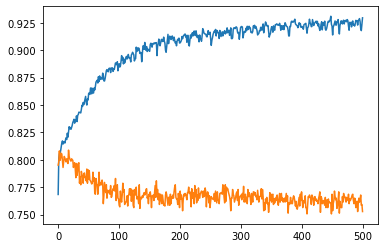

In [67]:
history_df['binary_accuracy'].plot()
history_df['val_binary_accuracy'].plot()

In [70]:
model_3 = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=23, activation='relu', input_shape=[23]),
    layers.Dense(units=23, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1, activation='sigmoid'),
])
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history=model_3.fit(x_1train,y_1train,epochs=500,validation_split=0.2)


Epoch 1/500
174/174 [==============================] - 1s 3ms/step - loss: 0.5796 - binary_accuracy: 0.7108 - val_loss: 0.4954 - val_binary_accuracy: 0.7656
Epoch 2/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4709 - binary_accuracy: 0.7730 - val_loss: 0.4463 - val_binary_accuracy: 0.7951
Epoch 3/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4383 - binary_accuracy: 0.7949 - val_loss: 0.4288 - val_binary_accuracy: 0.7994
Epoch 4/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4223 - binary_accuracy: 0.8035 - val_loss: 0.4225 - val_binary_accuracy: 0.8037
Epoch 5/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4140 - binary_accuracy: 0.8059 - val_loss: 0.4161 - val_binary_accuracy: 0.8037
Epoch 6/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4101 - binary_accuracy: 0.8050 - val_loss: 0.4120 - val_binary_accuracy: 0.8073
Epoch 7/500
174/174 [==============================] - 0s 

Epoch 53/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3693 - binary_accuracy: 0.8208 - val_loss: 0.4109 - val_binary_accuracy: 0.8030
Epoch 54/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3692 - binary_accuracy: 0.8226 - val_loss: 0.4131 - val_binary_accuracy: 0.8045
Epoch 55/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3686 - binary_accuracy: 0.8222 - val_loss: 0.4150 - val_binary_accuracy: 0.8081
Epoch 56/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3690 - binary_accuracy: 0.8222 - val_loss: 0.4121 - val_binary_accuracy: 0.8016
Epoch 57/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3681 - binary_accuracy: 0.8195 - val_loss: 0.4173 - val_binary_accuracy: 0.8045
Epoch 58/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3688 - binary_accuracy: 0.8208 - val_loss: 0.4155 - val_binary_accuracy: 0.8073
Epoch 59/500
174/174 [==============================

Epoch 105/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3525 - binary_accuracy: 0.8299 - val_loss: 0.4229 - val_binary_accuracy: 0.8045
Epoch 106/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3527 - binary_accuracy: 0.8301 - val_loss: 0.4317 - val_binary_accuracy: 0.8066
Epoch 107/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3539 - binary_accuracy: 0.8260 - val_loss: 0.4311 - val_binary_accuracy: 0.8052
Epoch 108/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3531 - binary_accuracy: 0.8278 - val_loss: 0.4277 - val_binary_accuracy: 0.8009
Epoch 109/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8325 - val_loss: 0.4328 - val_binary_accuracy: 0.8052
Epoch 110/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3527 - binary_accuracy: 0.8296 - val_loss: 0.4283 - val_binary_accuracy: 0.8052
Epoch 111/500
174/174 [=======================

174/174 [==============================] - 0s 2ms/step - loss: 0.3333 - binary_accuracy: 0.8377 - val_loss: 0.4698 - val_binary_accuracy: 0.7994
Epoch 208/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3332 - binary_accuracy: 0.8371 - val_loss: 0.4730 - val_binary_accuracy: 0.7980
Epoch 209/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3329 - binary_accuracy: 0.8393 - val_loss: 0.4721 - val_binary_accuracy: 0.7944
Epoch 210/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3337 - binary_accuracy: 0.8386 - val_loss: 0.4750 - val_binary_accuracy: 0.7937
Epoch 211/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3329 - binary_accuracy: 0.8402 - val_loss: 0.4723 - val_binary_accuracy: 0.7930
Epoch 212/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3326 - binary_accuracy: 0.8371 - val_loss: 0.4748 - val_binary_accuracy: 0.7922
Epoch 213/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 2ms/step - loss: 0.3198 - binary_accuracy: 0.8499 - val_loss: 0.5290 - val_binary_accuracy: 0.7922
Epoch 310/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3193 - binary_accuracy: 0.8504 - val_loss: 0.5240 - val_binary_accuracy: 0.7930
Epoch 311/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3174 - binary_accuracy: 0.8494 - val_loss: 0.5228 - val_binary_accuracy: 0.7908
Epoch 312/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3196 - binary_accuracy: 0.8485 - val_loss: 0.5254 - val_binary_accuracy: 0.7930
Epoch 313/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3177 - binary_accuracy: 0.8481 - val_loss: 0.5294 - val_binary_accuracy: 0.7922
Epoch 314/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3178 - binary_accuracy: 0.8485 - val_loss: 0.5289 - val_binary_accuracy: 0.7865
Epoch 315/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 2ms/step - loss: 0.3091 - binary_accuracy: 0.8537 - val_loss: 0.5814 - val_binary_accuracy: 0.7829
Epoch 412/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 0.8553 - val_loss: 0.5821 - val_binary_accuracy: 0.7872
Epoch 413/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3100 - binary_accuracy: 0.8512 - val_loss: 0.5763 - val_binary_accuracy: 0.7815
Epoch 414/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3085 - binary_accuracy: 0.8517 - val_loss: 0.5802 - val_binary_accuracy: 0.7843
Epoch 415/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3087 - binary_accuracy: 0.8497 - val_loss: 0.5795 - val_binary_accuracy: 0.7879
Epoch 416/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3106 - binary_accuracy: 0.8530 - val_loss: 0.5751 - val_binary_accuracy: 0.7800
Epoch 417/500
174/174 [==============================] - 0s 

In [71]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.579603,0.710768,0.495425,0.765636
1,0.470900,0.772964,0.446285,0.795111
2,0.438294,0.794895,0.428801,0.799425
3,0.422316,0.803523,0.422482,0.803738
4,0.414027,0.805860,0.416137,0.803738
...,...,...,...,...
495,0.301637,0.857271,0.612771,0.780014
496,0.301832,0.858170,0.606758,0.782890
497,0.303559,0.854036,0.610206,0.785766
498,0.301630,0.859249,0.605922,0.784328


### Building the first random forest model with the whole data

In [72]:
rf = RandomForestClassifier(n_estimators=70,max_depth=8,max_features=5,criterion='gini',random_state=23)
rf.fit(x,y)

RandomForestClassifier(max_depth=8, max_features=5, n_estimators=70,
                       random_state=23)

### Reading the test data for submission

In [26]:
test=pd.read_csv(r"C:\Users\Govind S\Downloads\ds\kaggle\knowledge\titanic\spaceship-titanic\test.csv")

In [27]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### preparing the test data

In [32]:
ID=test.PassengerId.copy()
test.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)
test['Cabin_s']=test.Cabin.str[-1]
test.Cabin=test.Cabin.str[0]
categorical_columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Cabin_s']
for i in categorical_columns:
    test[i].fillna(test[i].mode()[0],inplace=True)

test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s
0,Earth,True,G,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,S
1,Earth,False,F,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,S
2,Europa,True,C,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,S
3,Europa,False,C,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,S
4,Earth,False,F,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,S
4273,Earth,False,F,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,S
4274,Mars,True,D,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,P
4275,Europa,False,D,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,P


In [33]:
test.VIP=test.VIP.astype('int')
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s
0,Earth,True,G,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,S
1,Earth,False,F,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,S
2,Europa,True,C,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,S
3,Europa,False,C,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,S
4,Earth,False,F,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0,S
4273,Earth,False,F,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0,S
4274,Mars,True,D,55 Cancri e,NaN,0,0.0,0.0,0.0,0.0,0.0,P
4275,Europa,False,D,TRAPPIST-1e,NaN,0,0.0,2680.0,0.0,0.0,523.0,P


In [34]:
categorical_columns.pop(-2)

'VIP'

In [35]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_columns:
    le=LabelEncoder()
    test[i]=le.fit_transform(test[i])

test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s
0,0,1,6,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,5,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1
2,1,1,2,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,1,0,2,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0,0,5,2,20.0,0,10.0,0.0,635.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,6,2,34.0,0,0.0,0.0,0.0,0.0,0.0,1
4273,0,0,5,2,42.0,0,0.0,847.0,17.0,10.0,144.0,1
4274,2,1,3,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0
4275,1,0,3,2,NaN,0,0.0,2680.0,0.0,0.0,523.0,0


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int64  
 2   Cabin         4277 non-null   int32  
 3   Destination   4277 non-null   int32  
 4   Age           4186 non-null   float64
 5   VIP           4277 non-null   int32  
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Cabin_s       4277 non-null   int32  
dtypes: float64(6), int32(5), int64(1)
memory usage: 317.6 KB


In [36]:
test['Age'].fillna(data_1['Age'].mean(),inplace=True)
cont_columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in cont_columns:
    test[i].fillna(data_1[i].median(),inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int64  
 2   Cabin         4277 non-null   int32  
 3   Destination   4277 non-null   int32  
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int32  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Cabin_s       4277 non-null   int32  
dtypes: float64(6), int32(5), int64(1)
memory usage: 317.6 KB


In [37]:
test_dummies=test.copy()

In [38]:
test_dummies=pd.get_dummies(test_dummies,columns=['HomePlanet','Cabin','Destination'])
test_dummies

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s,HomePlanet_0,...,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Destination_0,Destination_1,Destination_2
0,1,27.00000,0,0.0,0.0,0.0,0.0,0.0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,19.00000,0,0.0,9.0,0.0,2823.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,1,31.00000,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,38.00000,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,20.00000,0,10.0,0.0,635.0,0.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.00000,0,0.0,0.0,0.0,0.0,0.0,1,1,...,0,0,0,0,0,1,0,0,0,1
4273,0,42.00000,0,0.0,847.0,17.0,10.0,144.0,1,1,...,0,0,0,0,1,0,0,0,0,1
4274,1,28.82793,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4275,0,28.82793,0,0.0,2680.0,0.0,0.0,523.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [93]:
x

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1


### predicting

In [92]:
a=rf.predict(test)

In [96]:
a=a.astype('bool')
a

array([ True, False,  True, ...,  True,  True,  True])

In [97]:
submission = pd.DataFrame({'PassengerId':ID,'Transported':a})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### Creating a csv file for submission

In [98]:
submission.to_csv('submission_new.csv',index=False)

### Doing the same process with the initial lgbm model

In [99]:
lgb = lgb.LGBMClassifier(learning_rate=0.07,random_state=42,max_depth=5)
lgb.fit(x,y,categorical_feature=[0,1,2,3,5,11],verbose=20)

C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(learning_rate=0.07, max_depth=5, random_state=42)

In [100]:
b=lgb.predict(test)

In [101]:
b=b.astype('bool')
b

array([ True, False,  True, ...,  True, False,  True])

In [104]:
submission = pd.DataFrame({'PassengerId':ID,'Transported':b})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,False


In [105]:
submission.to_csv('submission_3.csv',index=False)

### This model got the best accuracy in kaggle

In [43]:
test_final=ss.transform(test_dummies)

### With the SVM model

In [44]:
c=svm.predict(test_final)

In [45]:
d=pd.Series(c)
d.value_counts()

1    2217
0    2060
dtype: int64

In [46]:
c=c.astype('bool')
c

array([ True, False,  True, ...,  True,  True,  True])

In [47]:
submission_c = pd.DataFrame({'PassengerId':ID,'Transported':c})
submission_c

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [48]:
submission_c.to_csv('submission_c.csv',index=False)

### Trying different structures for neural network

In [52]:
model_4 = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=23, activation='relu', input_shape=[23]),
    layers.Dense(units=15, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])
model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history=model_4.fit(x_1train,y_1train,epochs=500,validation_split=0.2)

Epoch 1/500
174/174 [==============================] - 2s 5ms/step - loss: 0.6243 - binary_accuracy: 0.6277 - val_loss: 0.4979 - val_binary_accuracy: 0.7699
Epoch 2/500
174/174 [==============================] - 1s 3ms/step - loss: 0.4674 - binary_accuracy: 0.7778 - val_loss: 0.4401 - val_binary_accuracy: 0.7958
Epoch 3/500
174/174 [==============================] - 1s 3ms/step - loss: 0.4314 - binary_accuracy: 0.7924 - val_loss: 0.4243 - val_binary_accuracy: 0.8052
Epoch 4/500
174/174 [==============================] - 1s 3ms/step - loss: 0.4192 - binary_accuracy: 0.7945 - val_loss: 0.4162 - val_binary_accuracy: 0.8023
Epoch 5/500
174/174 [==============================] - 1s 3ms/step - loss: 0.4128 - binary_accuracy: 0.7997 - val_loss: 0.4142 - val_binary_accuracy: 0.8081
Epoch 6/500
174/174 [==============================] - 0s 2ms/step - loss: 0.4088 - binary_accuracy: 0.7990 - val_loss: 0.4130 - val_binary_accuracy: 0.8045
Epoch 7/500
174/174 [==============================] - 1s 

Epoch 53/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3697 - binary_accuracy: 0.8213 - val_loss: 0.4161 - val_binary_accuracy: 0.8001
Epoch 54/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3695 - binary_accuracy: 0.8204 - val_loss: 0.4150 - val_binary_accuracy: 0.8059
Epoch 55/500
174/174 [==============================] - 0s 3ms/step - loss: 0.3696 - binary_accuracy: 0.8224 - val_loss: 0.4166 - val_binary_accuracy: 0.8016
Epoch 56/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3694 - binary_accuracy: 0.8192 - val_loss: 0.4155 - val_binary_accuracy: 0.8001
Epoch 57/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3681 - binary_accuracy: 0.8228 - val_loss: 0.4173 - val_binary_accuracy: 0.7951
Epoch 58/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3675 - binary_accuracy: 0.8251 - val_loss: 0.4183 - val_binary_accuracy: 0.8016
Epoch 59/500
174/174 [==============================

Epoch 105/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3571 - binary_accuracy: 0.8249 - val_loss: 0.4370 - val_binary_accuracy: 0.8030
Epoch 106/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3548 - binary_accuracy: 0.8258 - val_loss: 0.4356 - val_binary_accuracy: 0.7987
Epoch 107/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3553 - binary_accuracy: 0.8274 - val_loss: 0.4375 - val_binary_accuracy: 0.7951
Epoch 108/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3551 - binary_accuracy: 0.8264 - val_loss: 0.4342 - val_binary_accuracy: 0.8052
Epoch 109/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3550 - binary_accuracy: 0.8289 - val_loss: 0.4367 - val_binary_accuracy: 0.7994
Epoch 110/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3564 - binary_accuracy: 0.8282 - val_loss: 0.4436 - val_binary_accuracy: 0.7973
Epoch 111/500
174/174 [=======================

174/174 [==============================] - 0s 2ms/step - loss: 0.3405 - binary_accuracy: 0.8384 - val_loss: 0.4644 - val_binary_accuracy: 0.8001
Epoch 208/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3406 - binary_accuracy: 0.8355 - val_loss: 0.4657 - val_binary_accuracy: 0.7937
Epoch 209/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3411 - binary_accuracy: 0.8325 - val_loss: 0.4690 - val_binary_accuracy: 0.8037
Epoch 210/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3404 - binary_accuracy: 0.8341 - val_loss: 0.4710 - val_binary_accuracy: 0.8030
Epoch 211/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3384 - binary_accuracy: 0.8366 - val_loss: 0.4660 - val_binary_accuracy: 0.7994
Epoch 212/500
174/174 [==============================] - 0s 3ms/step - loss: 0.3406 - binary_accuracy: 0.8350 - val_loss: 0.4643 - val_binary_accuracy: 0.7994
Epoch 213/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 2ms/step - loss: 0.3283 - binary_accuracy: 0.8375 - val_loss: 0.4960 - val_binary_accuracy: 0.7922
Epoch 310/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3277 - binary_accuracy: 0.8413 - val_loss: 0.4975 - val_binary_accuracy: 0.7886
Epoch 311/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3276 - binary_accuracy: 0.8418 - val_loss: 0.4962 - val_binary_accuracy: 0.7915
Epoch 312/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3274 - binary_accuracy: 0.8398 - val_loss: 0.4988 - val_binary_accuracy: 0.7908
Epoch 313/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3278 - binary_accuracy: 0.8406 - val_loss: 0.4928 - val_binary_accuracy: 0.7930
Epoch 314/500
174/174 [==============================] - 0s 2ms/step - loss: 0.3278 - binary_accuracy: 0.8407 - val_loss: 0.4962 - val_binary_accuracy: 0.7930
Epoch 315/500
174/174 [==============================] - 0s 

174/174 [==============================] - 1s 3ms/step - loss: 0.3213 - binary_accuracy: 0.8418 - val_loss: 0.5224 - val_binary_accuracy: 0.7829
Epoch 412/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3226 - binary_accuracy: 0.8415 - val_loss: 0.5251 - val_binary_accuracy: 0.7930
Epoch 413/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3212 - binary_accuracy: 0.8447 - val_loss: 0.5254 - val_binary_accuracy: 0.7829
Epoch 414/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3202 - binary_accuracy: 0.8443 - val_loss: 0.5172 - val_binary_accuracy: 0.7836
Epoch 415/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3211 - binary_accuracy: 0.8459 - val_loss: 0.5220 - val_binary_accuracy: 0.7836
Epoch 416/500
174/174 [==============================] - 1s 3ms/step - loss: 0.3212 - binary_accuracy: 0.8445 - val_loss: 0.5228 - val_binary_accuracy: 0.7858
Epoch 417/500
174/174 [==============================] - 1s 

In [53]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.624344,0.627719,0.497918,0.769950
1,0.467397,0.777818,0.440130,0.795830
2,0.431390,0.792378,0.424347,0.805176
3,0.419205,0.794535,0.416160,0.802301
4,0.412766,0.799748,0.414238,0.808052
...,...,...,...,...
495,0.316993,0.844868,0.542680,0.781452
496,0.315692,0.846306,0.535921,0.781452
497,0.316593,0.843430,0.537583,0.783609
498,0.317576,0.844149,0.536754,0.783609


In [54]:
model_5 = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=23, activation='relu', input_shape=[23]),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])
model_5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history=model_5.fit(x_1train,y_1train,epochs=250,validation_split=0.2)

Epoch 1/250
174/174 [==============================] - 2s 4ms/step - loss: 0.6326 - binary_accuracy: 0.6689 - val_loss: 0.5325 - val_binary_accuracy: 0.7556
Epoch 2/250
174/174 [==============================] - 1s 3ms/step - loss: 0.4773 - binary_accuracy: 0.7681 - val_loss: 0.4537 - val_binary_accuracy: 0.7836
Epoch 3/250
174/174 [==============================] - 1s 3ms/step - loss: 0.4354 - binary_accuracy: 0.7873 - val_loss: 0.4359 - val_binary_accuracy: 0.7850
Epoch 4/250
174/174 [==============================] - 0s 2ms/step - loss: 0.4212 - binary_accuracy: 0.7940 - val_loss: 0.4293 - val_binary_accuracy: 0.8052
Epoch 5/250
174/174 [==============================] - 0s 3ms/step - loss: 0.4129 - binary_accuracy: 0.7997 - val_loss: 0.4207 - val_binary_accuracy: 0.8030
Epoch 6/250
174/174 [==============================] - 0s 2ms/step - loss: 0.4086 - binary_accuracy: 0.8023 - val_loss: 0.4177 - val_binary_accuracy: 0.8059
Epoch 7/250
174/174 [==============================] - 0s 

Epoch 53/250
174/174 [==============================] - 0s 2ms/step - loss: 0.3722 - binary_accuracy: 0.8224 - val_loss: 0.4066 - val_binary_accuracy: 0.8052
Epoch 54/250
174/174 [==============================] - 0s 2ms/step - loss: 0.3718 - binary_accuracy: 0.8193 - val_loss: 0.4087 - val_binary_accuracy: 0.8030
Epoch 55/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3719 - binary_accuracy: 0.8145 - val_loss: 0.4080 - val_binary_accuracy: 0.8030
Epoch 56/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3703 - binary_accuracy: 0.8206 - val_loss: 0.4078 - val_binary_accuracy: 0.8023
Epoch 57/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3708 - binary_accuracy: 0.8193 - val_loss: 0.4089 - val_binary_accuracy: 0.7980
Epoch 58/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3700 - binary_accuracy: 0.8208 - val_loss: 0.4067 - val_binary_accuracy: 0.8066
Epoch 59/250
174/174 [==============================

Epoch 105/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3568 - binary_accuracy: 0.8280 - val_loss: 0.4170 - val_binary_accuracy: 0.8016
Epoch 106/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3570 - binary_accuracy: 0.8276 - val_loss: 0.4146 - val_binary_accuracy: 0.8037
Epoch 107/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3568 - binary_accuracy: 0.8287 - val_loss: 0.4140 - val_binary_accuracy: 0.8037
Epoch 108/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3560 - binary_accuracy: 0.8305 - val_loss: 0.4141 - val_binary_accuracy: 0.8023
Epoch 109/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3551 - binary_accuracy: 0.8290 - val_loss: 0.4176 - val_binary_accuracy: 0.8001
Epoch 110/250
174/174 [==============================] - 1s 3ms/step - loss: 0.3559 - binary_accuracy: 0.8271 - val_loss: 0.4164 - val_binary_accuracy: 0.8016
Epoch 111/250
174/174 [=======================

174/174 [==============================] - 1s 3ms/step - loss: 0.3434 - binary_accuracy: 0.8317 - val_loss: 0.4341 - val_binary_accuracy: 0.7958
Epoch 208/250
174/174 [==============================] - 0s 2ms/step - loss: 0.3426 - binary_accuracy: 0.8346 - val_loss: 0.4279 - val_binary_accuracy: 0.7965
Epoch 209/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3444 - binary_accuracy: 0.8355 - val_loss: 0.4276 - val_binary_accuracy: 0.8059
Epoch 210/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3434 - binary_accuracy: 0.8332 - val_loss: 0.4258 - val_binary_accuracy: 0.8016
Epoch 211/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3436 - binary_accuracy: 0.8334 - val_loss: 0.4318 - val_binary_accuracy: 0.8001
Epoch 212/250
174/174 [==============================] - 0s 3ms/step - loss: 0.3435 - binary_accuracy: 0.8334 - val_loss: 0.4281 - val_binary_accuracy: 0.8037
Epoch 213/250
174/174 [==============================] - 1s 

In [55]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.632622,0.668884,0.532456,0.755572
1,0.477253,0.768111,0.453660,0.783609
2,0.435405,0.787345,0.435887,0.785047
3,0.421234,0.793996,0.429259,0.805176
4,0.412916,0.799748,0.420700,0.803019
...,...,...,...,...
245,0.339101,0.836779,0.435755,0.796549
246,0.339899,0.835880,0.438864,0.803738
247,0.339814,0.834622,0.439901,0.797268
248,0.341073,0.834622,0.437840,0.808052


In [57]:
print(metrics.accuracy_score(y_1test,np.round(model_5.predict(x_1test))))
print(metrics.recall_score(y_1test,np.round(model_5.predict(x_1test))))
print(metrics.classification_report(y_1test,np.round(model_5.predict(x_1test))))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_1test,np.round(model_5.predict(x_1test))))

55/55 [==============================] - 0s 1ms/step
0.7918343875790684
55/55 [==============================] - 0s 1ms/step
0.8116438356164384
55/55 [==============================] - 0s 871us/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       863
           1       0.78      0.81      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

55/55 [==============================] - 0s 1ms/step
confusion matrix:

 [[666 197]
 [165 711]]


### Creating a modelwith the whole data with the best model structure

In [59]:
model_6 = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=23, activation='relu', input_shape=[23]),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])
model_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history=model_6.fit(x_1,y_1,epochs=250,validation_split=0.2)

Epoch 1/250
218/218 [==============================] - 1s 2ms/step - loss: 0.5472 - binary_accuracy: 0.7114 - val_loss: 0.4647 - val_binary_accuracy: 0.7769
Epoch 2/250
218/218 [==============================] - 0s 2ms/step - loss: 0.4489 - binary_accuracy: 0.7844 - val_loss: 0.4247 - val_binary_accuracy: 0.7993
Epoch 3/250
218/218 [==============================] - 0s 2ms/step - loss: 0.4266 - binary_accuracy: 0.7949 - val_loss: 0.4140 - val_binary_accuracy: 0.8033
Epoch 4/250
218/218 [==============================] - 0s 2ms/step - loss: 0.4180 - binary_accuracy: 0.7982 - val_loss: 0.4057 - val_binary_accuracy: 0.8068
Epoch 5/250
218/218 [==============================] - 0s 2ms/step - loss: 0.4128 - binary_accuracy: 0.8030 - val_loss: 0.4059 - val_binary_accuracy: 0.8022
Epoch 6/250
218/218 [==============================] - 0s 2ms/step - loss: 0.4092 - binary_accuracy: 0.8057 - val_loss: 0.4049 - val_binary_accuracy: 0.8033
Epoch 7/250
218/218 [==============================] - 0s 

Epoch 53/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3777 - binary_accuracy: 0.8174 - val_loss: 0.4016 - val_binary_accuracy: 0.8005
Epoch 54/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3776 - binary_accuracy: 0.8162 - val_loss: 0.4050 - val_binary_accuracy: 0.7976
Epoch 55/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3770 - binary_accuracy: 0.8191 - val_loss: 0.4016 - val_binary_accuracy: 0.8051
Epoch 56/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3780 - binary_accuracy: 0.8164 - val_loss: 0.4055 - val_binary_accuracy: 0.7959
Epoch 57/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3776 - binary_accuracy: 0.8188 - val_loss: 0.4002 - val_binary_accuracy: 0.8051
Epoch 58/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3766 - binary_accuracy: 0.8172 - val_loss: 0.3966 - val_binary_accuracy: 0.8056
Epoch 59/250
218/218 [==============================

Epoch 105/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3664 - binary_accuracy: 0.8191 - val_loss: 0.4164 - val_binary_accuracy: 0.7999
Epoch 106/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3674 - binary_accuracy: 0.8195 - val_loss: 0.4210 - val_binary_accuracy: 0.7976
Epoch 107/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.8202 - val_loss: 0.4202 - val_binary_accuracy: 0.7999
Epoch 108/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3670 - binary_accuracy: 0.8182 - val_loss: 0.4253 - val_binary_accuracy: 0.7930
Epoch 109/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3661 - binary_accuracy: 0.8210 - val_loss: 0.4144 - val_binary_accuracy: 0.8022
Epoch 110/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3655 - binary_accuracy: 0.8200 - val_loss: 0.4176 - val_binary_accuracy: 0.8005
Epoch 111/250
218/218 [=======================

218/218 [==============================] - 0s 2ms/step - loss: 0.3554 - binary_accuracy: 0.8267 - val_loss: 0.4379 - val_binary_accuracy: 0.7913
Epoch 208/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3567 - binary_accuracy: 0.8264 - val_loss: 0.4332 - val_binary_accuracy: 0.7936
Epoch 209/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3554 - binary_accuracy: 0.8259 - val_loss: 0.4403 - val_binary_accuracy: 0.7930
Epoch 210/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3567 - binary_accuracy: 0.8250 - val_loss: 0.4485 - val_binary_accuracy: 0.7907
Epoch 211/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3553 - binary_accuracy: 0.8287 - val_loss: 0.4372 - val_binary_accuracy: 0.7884
Epoch 212/250
218/218 [==============================] - 0s 2ms/step - loss: 0.3556 - binary_accuracy: 0.8277 - val_loss: 0.4269 - val_binary_accuracy: 0.7901
Epoch 213/250
218/218 [==============================] - 0s 

In [74]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.547219,0.711389,0.464741,0.776883
1,0.448853,0.784441,0.424687,0.799310
2,0.426574,0.794938,0.413960,0.803335
3,0.418030,0.798246,0.405703,0.806786
4,0.412764,0.802991,0.405869,0.802185
...,...,...,...,...
245,0.353255,0.825568,0.432310,0.800460
246,0.353618,0.826862,0.439796,0.790109
247,0.352328,0.828156,0.448487,0.790684
248,0.352395,0.827150,0.441942,0.791834


In [75]:
test_final

array([[ 1.36468464e+00, -1.27486483e-01, -1.53063067e-01, ...,
        -5.11013194e-01, -3.17486647e-01,  6.52520630e-01],
       [-7.32770025e-01, -6.85435421e-01, -1.53063067e-01, ...,
        -5.11013194e-01, -3.17486647e-01,  6.52520630e-01],
       [ 1.36468464e+00,  1.51487986e-01, -1.53063067e-01, ...,
         1.95689664e+00, -3.17486647e-01, -1.53251860e+00],
       ...,
       [ 1.36468464e+00, -4.95558206e-16, -1.53063067e-01, ...,
         1.95689664e+00, -3.17486647e-01, -1.53251860e+00],
       [-7.32770025e-01, -4.95558206e-16, -1.53063067e-01, ...,
        -5.11013194e-01, -3.17486647e-01,  6.52520630e-01],
       [ 1.36468464e+00,  9.88411394e-01, -1.53063067e-01, ...,
        -5.11013194e-01,  3.14973876e+00, -1.53251860e+00]])

In [78]:
e=model_6.predict(test_final)
e=np.round(e).astype('bool')
e

134/134 [==============================] - 0s 977us/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [79]:
e[:,0]

array([ True, False,  True, ...,  True,  True,  True])

### creating a csv file for submission

In [80]:
submission_e = pd.DataFrame({'PassengerId':ID,'Transported':e[:,0]})
submission_e

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [81]:
submission_e.Transported.value_counts()

True     2300
False    1977
Name: Transported, dtype: int64

In [82]:
submission_e.to_csv('submission_e.csv',index=False)

In [83]:
data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


### Removing outliers

<AxesSubplot:>

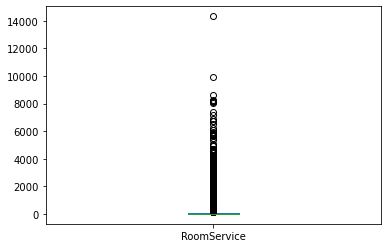

In [85]:
data_1.RoomService.plot(kind='box')

<AxesSubplot:>

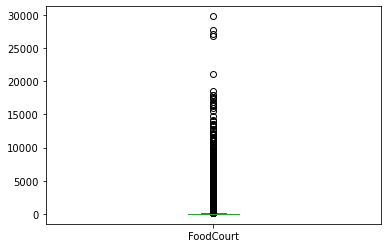

In [86]:
data_1.FoodCourt.plot(kind='box')

<AxesSubplot:>

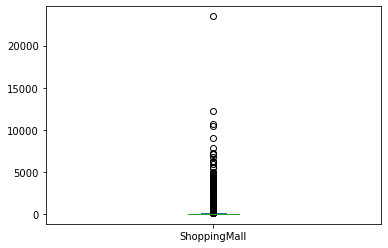

In [88]:
data_1.ShoppingMall.plot(kind='box')

<AxesSubplot:>

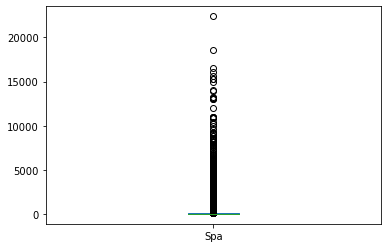

In [89]:
data_1.Spa.plot(kind='box')

<AxesSubplot:>

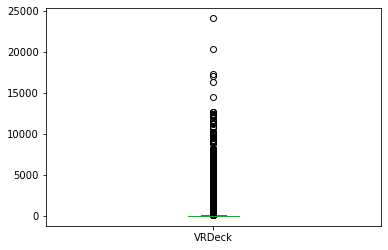

In [90]:
data_1.VRDeck.plot(kind='box')

In [91]:
data_1[data_1.ShoppingMall>20000]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
8415,1,0,1,2,17.0,0,0.0,366.0,23492.0,356.0,3.0,1,0


In [92]:
data_1[data_1.FoodCourt>25000]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
1213,1,0,1,0,31.0,1,0.0,27723.0,3.0,202.0,3146.0,1,1
2067,1,0,0,0,41.0,1,0.0,29813.0,0.0,1257.0,6.0,1,1
3198,1,0,1,0,33.0,0,0.0,27071.0,0.0,15.0,0.0,1,1
3538,1,0,1,0,33.0,0,90.0,26830.0,0.0,27.0,703.0,1,0


In [93]:

data_1[data_1.RoomService>12000]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
4416,1,0,5,2,27.0,0,14327.0,1487.0,0.0,1.0,0.0,0,1


In [94]:
data_1[data_1.Spa>20000]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
5722,1,0,2,0,68.0,0,125.0,13437.0,0.0,22408.0,17.0,0,0


In [95]:
data_1[data_1.VRDeck>20000]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
4311,1,0,2,2,31.0,0,0.0,6670.0,217.0,625.0,20336.0,0,0
5619,1,0,1,0,57.0,0,200.0,9.0,0.0,0.0,24133.0,0,1


In [96]:
data_3=data_1.copy()

In [97]:
data_3=data_3[(data_3.ShoppingMall<20000) & (data_3.FoodCourt<25000) & (data_3.RoomService<12000) & (data_3.Spa<20000) & (data_3.VRDeck<20000)]

In [98]:
data_3

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


In [99]:
data_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_s
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


In [100]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8684 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8684 non-null   int32  
 1   CryoSleep     8684 non-null   int64  
 2   Cabin         8684 non-null   int32  
 3   Destination   8684 non-null   int32  
 4   Age           8684 non-null   float64
 5   VIP           8684 non-null   int32  
 6   RoomService   8684 non-null   float64
 7   FoodCourt     8684 non-null   float64
 8   ShoppingMall  8684 non-null   float64
 9   Spa           8684 non-null   float64
 10  VRDeck        8684 non-null   float64
 11  Transported   8684 non-null   int32  
 12  Cabin_s       8684 non-null   int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 746.3 KB


In [102]:
x_2=data_3.drop(['Transported'],axis=1)
ss=preprocessing.StandardScaler()
x_2=ss.fit_transform(x_2)
y_2=data_3.iloc[:,-2]
x_2train,x_2test,y_2train,y_2test=train_test_split(x_2,y_2, test_size=0.2,random_state=0)
kfold=KFold(n_splits=10)

### Lgbm model with the new outlier-removed data

In [106]:
import lightgbm as lgb
param_grid=[{'max_depth':[2,3,4,5,6,7,8,9,10,11,12],'learning_rate':[0.01,0.03,0.05,0.07,0.09,0.10,0.20]}]
model_lgb_2 = lgb.LGBMClassifier(random_state=42,categorical_feature=[0,1,2,3,5,11])
gslgb = GridSearchCV(model_lgb_2,param_grid,n_jobs=-1,cv=kfold)
gslgb.fit(x_2train,y_2train)
gslgb.best_params_ , gslgb.best_score_

C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'


({'learning_rate': 0.1, 'max_depth': 3}, 0.7994854145502042)

In [107]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.1,random_state=42,max_depth=3)
model_lgb.fit(x_2train,y_2train,categorical_feature=[0,1,2,3,5,11],verbose=20)
print(metrics.accuracy_score(y_2test,model_lgb.predict(x_2test)))
print(metrics.recall_score(y_2test,model_lgb.predict(x_2test)))
print(metrics.classification_report(y_2test,model_lgb.predict(x_2test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_2test,model_lgb.predict(x_2test)))

0.7835348301669545
0.8303886925795053
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       888
           1       0.75      0.83      0.79       849

    accuracy                           0.78      1737
   macro avg       0.79      0.78      0.78      1737
weighted avg       0.79      0.78      0.78      1737

confusion matrix:

 [[656 232]
 [144 705]]


C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Govind S\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


### Random forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5,6,7,8,9,10,11,12],'max_features':[3,4,5,6]}]
rf = RandomForestClassifier(criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,n_jobs=-1,cv=kfold)
gsrf.fit(x_2train,y_2train)
gsrf.best_params_ , gsrf.best_score_

({'max_depth': 11, 'max_features': 4, 'n_estimators': 88}, 0.8056724649099165)

In [110]:
model_rf = RandomForestClassifier(n_estimators=88,max_depth=11,max_features=4,criterion='gini',random_state=23)
model_rf.fit(x_2train,y_2train)
print(metrics.accuracy_score(y_2test,model_rf.predict(x_2test)))
print(metrics.recall_score(y_2test,model_rf.predict(x_2test)))
print(metrics.classification_report(y_2test,model_rf.predict(x_2test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_2test,model_rf.predict(x_2test)))

0.7887161773172136
0.7856301531213192
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       888
           1       0.78      0.79      0.78       849

    accuracy                           0.79      1737
   macro avg       0.79      0.79      0.79      1737
weighted avg       0.79      0.79      0.79      1737

confusion matrix:

 [[703 185]
 [182 667]]


In [111]:
rf=RandomForestClassifier(n_estimators=88,max_depth=11,max_features=4,criterion='gini',random_state=23)
rf.fit(x_2,y_2)

RandomForestClassifier(max_depth=11, max_features=4, n_estimators=88,
                       random_state=23)

In [112]:
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_s
0,0,1,6,2,27.00000,0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,5,2,19.00000,0,0.0,9.0,0.0,2823.0,0.0,1
2,1,1,2,0,31.00000,0,0.0,0.0,0.0,0.0,0.0,1
3,1,0,2,2,38.00000,0,0.0,6652.0,0.0,181.0,585.0,1
4,0,0,5,2,20.00000,0,10.0,0.0,635.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,6,2,34.00000,0,0.0,0.0,0.0,0.0,0.0,1
4273,0,0,5,2,42.00000,0,0.0,847.0,17.0,10.0,144.0,1
4274,2,1,3,0,28.82793,0,0.0,0.0,0.0,0.0,0.0,0
4275,1,0,3,2,28.82793,0,0.0,2680.0,0.0,0.0,523.0,0


In [113]:
f=rf.predict(ss.transform(test))
f

array([1, 0, 1, ..., 1, 1, 1])

In [114]:
f=f.astype('bool')

In [115]:
f

array([ True, False,  True, ...,  True,  True,  True])

In [116]:
submission_f = pd.DataFrame({'PassengerId':ID,'Transported':f})
submission_f

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [118]:
submission_f.to_csv('submission_f.csv',index=False)